In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X=dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=23)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
wcss

[269981.28,
 186362.95600651755,
 132087.72428243398,
 73679.78903948836,
 44448.4554479337,
 37455.98455516028,
 32233.42255063777,
 29786.96797469772,
 27626.6369949495,
 24298.8645399851,
 17768.488379594262,
 16587.6600190659,
 15299.265808879049,
 13937.46300057624,
 13508.522596535833,
 12013.159403814578,
 10745.051467306641,
 9860.520484400658,
 9343.607563270063,
 8991.631372793872]

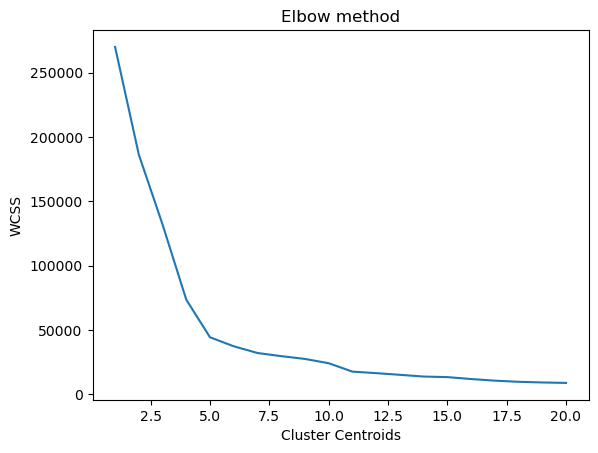

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),wcss)
plt.xlabel('Cluster Centroids')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=5,random_state=23)
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=23)

In [19]:
y_kmeans=kmeans.predict(X)

In [21]:
centroids=kmeans.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

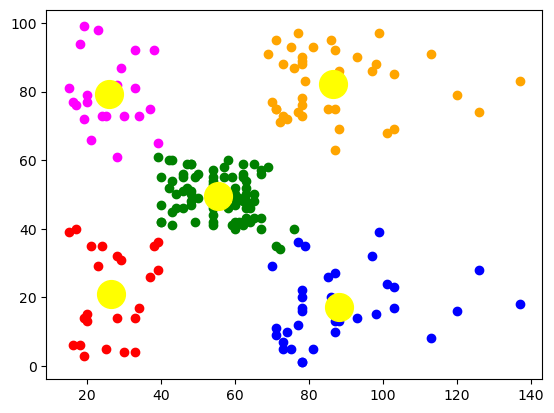

In [29]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], color='g')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], color='b')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], color='r')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], color='magenta')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], color='orange')
plt.scatter(centroids[:, 0],centroids[:,1], color='yellow',s=400)
plt.show

In [ ]:
#dendrogram

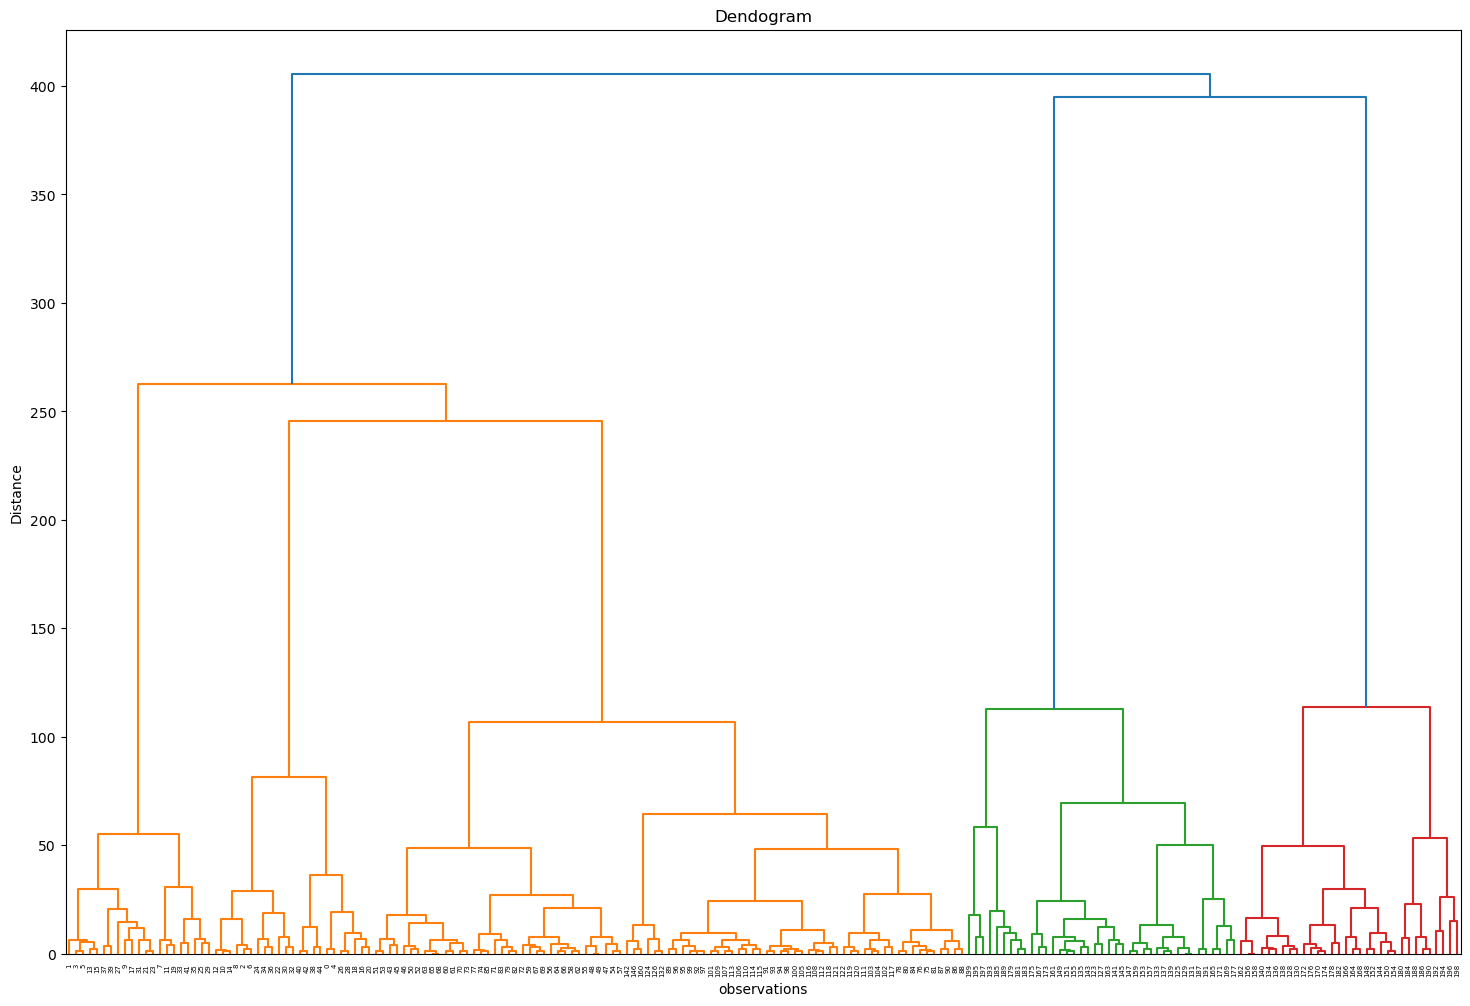

In [33]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,12))
sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('observations')
plt.ylabel('Distance')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering


In [37]:
cluster=AgglomerativeClustering(n_clusters=5, linkage='ward')


In [39]:
y_hierachical=cluster.fit_predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

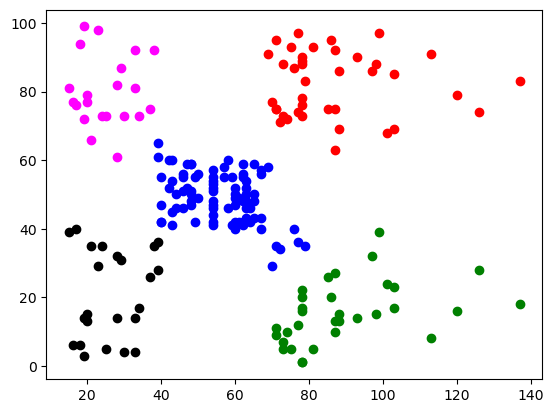

In [41]:
plt.scatter(X[y_hierachical==0,0],X[y_hierachical==0,1], color='g')
plt.scatter(X[y_hierachical==1,0],X[y_hierachical==1,1], color='b')
plt.scatter(X[y_hierachical==2,0],X[y_hierachical==2,1], color='r')
plt.scatter(X[y_hierachical==3,0],X[y_hierachical==3,1], color='magenta')
plt.scatter(X[y_hierachical==4,0],X[y_hierachical==4,1], color='black')
plt.show